# Multilayer Perceptron from raw data
This notebook will guide you through the use of the `keras` package to train a multilayer perceptron for handwritten digits classification. You are going to use the `mnist` dataset from LeCun et al. 1998

## Loading the packages

In [1]:
import numpy as np
from matplotlib import pyplot as pl

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout
from keras.optimizers import RMSprop
from keras.utils import np_utils
from sklearn import metrics as me

%matplotlib inline

Using TensorFlow backend.


## Using raw data to train a MLP
First load the `mnist` dataset and normalize it to be in the range [0, 1]

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

n_classes = 10
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)

60000 train samples
10000 test samples


Create the MLP

In [3]:
model = Sequential()
model.add(Dense(300, input_shape=(784,), activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                3010      
Total params: 238,510
Trainable params: 238,510
Non-trainable params: 0
_________________________________________________________________


Define some constants and train the MLP

In [4]:
batch_size = 128
n_epoch = 10

model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])
history = model.fit(X_train, Y_train,
                    batch_size=batch_size, epochs=n_epoch,
                    verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 32us/step - loss: 0.2832 - acc: 0.9187 - val_loss: 0.1729 - val_acc: 0.9492
Epoch 2/10
60000/60000 [==============================] - 1s 13us/step - loss: 0.1214 - acc: 0.9646 - val_loss: 0.1018 - val_acc: 0.9696
Epoch 3/10
60000/60000 [==============================] - 1s 13us/step - loss: 0.0834 - acc: 0.9754 - val_loss: 0.0821 - val_acc: 0.9755
Epoch 4/10
60000/60000 [==============================] - 1s 13us/step - loss: 0.0614 - acc: 0.9819 - val_loss: 0.0818 - val_acc: 0.9760
Epoch 5/10
60000/60000 [==============================] - 1s 13us/step - loss: 0.0477 - acc: 0.9861 - val_loss: 0.0664 - val_acc: 0.9790
Epoch 6/10
60000/60000 [==============================] - 1s 13us/step - loss: 0.0390 - acc: 0.9886 - val_loss: 0.0642 - val_acc: 0.9802
Epoch 7/10
60000/60000 [==============================] - 1s 13us/step - loss: 0.0306 - acc: 0.9913 - val_loss: 0.0722 - val_acc

Show the performance of the model

Test score: 0.06934720972418436
Test accuracy: 0.9812


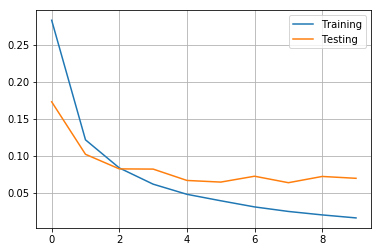

In [5]:
pl.plot(history.history['loss'], label='Training')
pl.plot(history.history['val_loss'], label='Testing')
pl.legend()
pl.grid()

score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Confusion matrix

In [6]:
pred = model.predict_classes(X_test)
me.confusion_matrix(y_test, pred)

array([[ 969,    0,    1,    1,    0,    0,    3,    2,    4,    0],
       [   0, 1123,    3,    1,    0,    0,    2,    0,    6,    0],
       [   1,    0, 1007,    1,    1,    0,    3,    2,   17,    0],
       [   0,    0,    3,  992,    0,    2,    0,    3,    5,    5],
       [   2,    0,    2,    1,  958,    0,    4,    2,    1,   12],
       [   2,    0,    0,    9,    1,  868,    1,    1,    7,    3],
       [   3,    3,    1,    1,    1,    6,  939,    0,    4,    0],
       [   0,    2,   10,    2,    0,    0,    0, 1007,    3,    4],
       [   1,    0,    2,    2,    1,    3,    0,    3,  959,    3],
       [   0,    2,    0,    2,    6,    3,    1,    3,    2,  990]])